Electrical Dataset

In [2]:
## Imports

import numpy as np
import pandas as pd


In [3]:
df = pd.read_csv('global_electricity_production_data.csv')

In [4]:
df.head()

,country_name,date,parameter,product,value,unit
0,Australia,12/1/2023,Net Electricity Production,Electricity,22646.1901,GWh
1,Australia,12/1/2023,Net Electricity Production,Total Combustible Fuels,13397.9356,GWh
2,Australia,12/1/2023,Net Electricity Production,"Coal, Peat and Manufactured Gases",9768.5223,GWh
3,Australia,12/1/2023,Net Electricity Production,Oil and Petroleum Products,289.5415,GWh
4,Australia,12/1/2023,Net Electricity Production,Natural Gas,3091.9272,GWh


In [5]:
df['date'] = pd.to_datetime(df['date'])
#df.set_index('date', inplace=True)

In [6]:
earliest_date = df['date'].min()
latest_date = df['date'].max()

print('Earliest Date:', earliest_date)
print('Latest Date:', latest_date)

Earliest Date: 2010-01-01 00:00:00
Latest Date: 2023-12-01 00:00:00


In [7]:
#Check for missing values:
print(df.isnull().sum())

country_name     0
date             0
parameter        0
product          0
value           14
unit             0
dtype: int64


In [8]:
# Display rows with the missing values:
df[df['value'].isna()]

,country_name,date,parameter,product,value,unit
67,Chile,2023-12-01,Remarks,Data is estimated for this month,NaN,GWh
94,Costa Rica,2023-12-01,Remarks,Data is estimated for this month,NaN,GWh
285,Japan,2023-12-01,Remarks,Data is estimated for this month,NaN,GWh
804,Costa Rica,2023-11-01,Remarks,Data is estimated for this month,NaN,GWh
1517,Costa Rica,2023-10-01,Remarks,Data is estimated for this month,NaN,GWh
2230,Costa Rica,2023-09-01,Remarks,Data is estimated for this month,NaN,GWh
2944,Costa Rica,2023-08-01,Remarks,Data is estimated for this month,NaN,GWh
3659,Costa Rica,2023-07-01,Remarks,Data is estimated for this month,NaN,GWh
4375,Costa Rica,2023-06-01,Remarks,Data is estimated for this month,NaN,GWh
5090,Costa Rica,2023-05-01,Remarks,Data is estimated for this month,NaN,GWh


In [9]:
df_clean = df.dropna(subset=['value'])
df_clean = df_clean.drop(columns=['unit']) #Drop column as all values are the same.
df_clean.set_index('date', inplace=True)
print(df_clean.isnull().sum())

country_name    0
parameter       0
product         0
value           0
dtype: int64


In [10]:
#Encoding categorical variables: use one-hot encoding (non-ordinal)
df_encoded = pd.get_dummies(df_clean,columns=['country_name', 'parameter', 'product'])
df_encoded.head()


,value,country_name_Argentina,country_name_Australia,country_name_Austria,country_name_Belgium,country_name_Brazil,country_name_Bulgaria,country_name_Canada,country_name_Chile,country_name_China,...,product_Natural Gas,product_Not Specified,product_Nuclear,product_Oil and Petroleum Products,product_Other Combustible Non-Renewables,product_Other Renewables,product_Solar,product_Total Combustible Fuels,"product_Total Renewables (Hydro, Geo, Solar, Wind, Other)",product_Wind
date,,,,,,,,,,,,,,,,,,,,,
2023-12-01,22646.1901,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-12-01,13397.9356,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2023-12-01,9768.5223,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-12-01,289.5415,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2023-12-01,3091.9272,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [11]:
#Checking if data is stationary: Augmented Dicky-Fuller Test (ADF)
from statsmodels.tsa.stattools import adfuller

# Target = ['value']
result = adfuller(df_clean['value'])
print('ADF Statistic:', result[0])
print('p-value', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}:{value}')

ADF Statistic: -29.82480302596551
p-value 0.0
Critical Values:
	1%:-3.430404050308679
	5%:-2.861563889435299
	10%:-2.566782715502506


The results from the Augmented Dickey-Fuller (ADF) test indicate a very low p-value (0.0) and an ADF statistic (-29.82) that is far below all critical values (-3.43, -2.86, -2.57). These findings strongly suggest that your time series data is stationary. Here’s a brief interpretation of these results:

ADF Statistic: The more negative this value is, the stronger the evidence against the null hypothesis (non-stationarity).
p-value: A low p-value (typically less than 0.05) indicates strong evidence against the null hypothesis.
Critical Values: These are thresholds beyond which you reject the null hypothesis (non-stationarity) with various levels of confidence (1%, 5%, 10%).


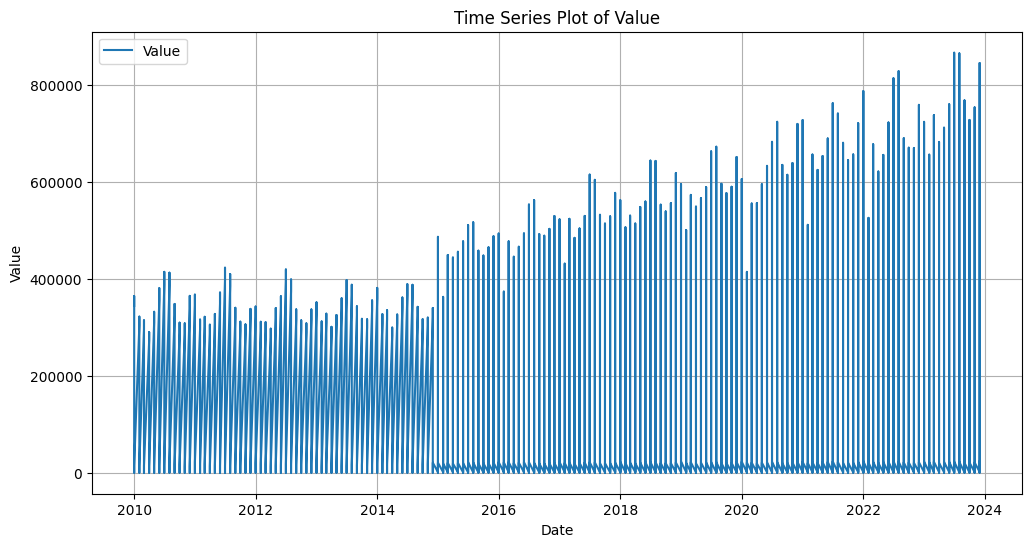

In [13]:
# Time Series Plot: Visually inspect for trends, seasonality or any patterns:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_clean.index, df_clean['value'], label='Value')
plt.title('Time Series Plot of Value')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


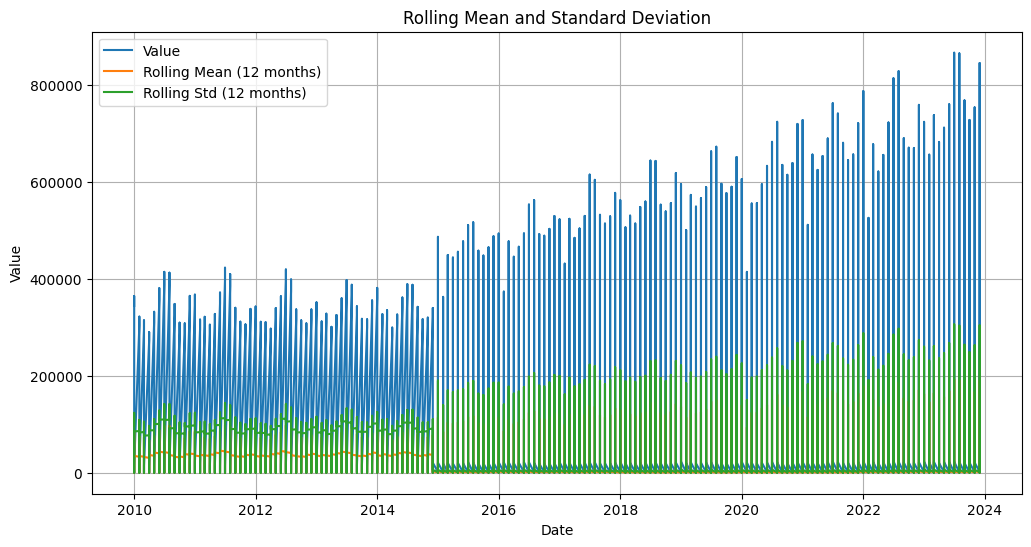

In [14]:
# Plotting rolling Statistics:
rolling_mean = df_clean['value'].rolling(window=12).mean()
rolling_std = df_clean['value'].rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(df_clean.index, df_clean['value'], label='Value')
plt.plot(df_clean.index, rolling_mean, label='Rolling Mean (12 months)')
plt.plot(df_clean.index, rolling_std, label='Rolling Std (12 months)')
plt.title('Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

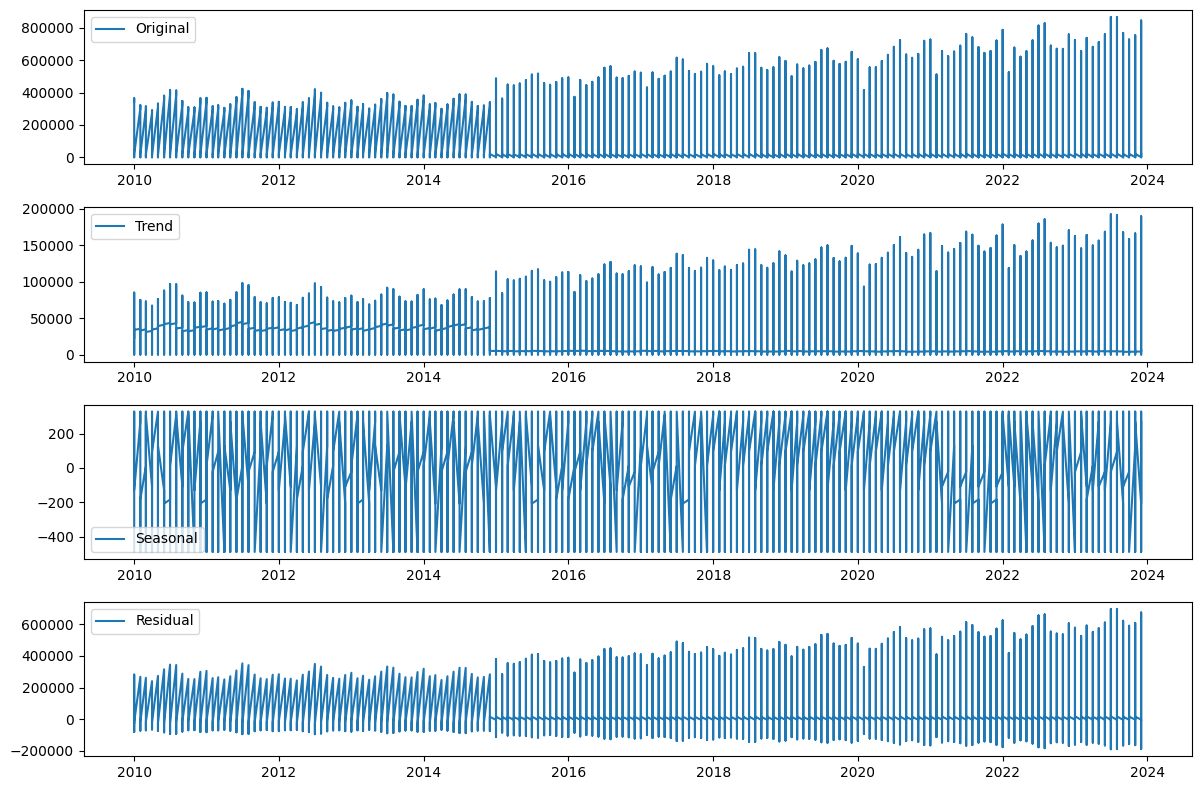

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_clean['value'], model='additive', period=12)

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df_clean.index, df_clean['value'], label='Original')
plt.legend()
plt.subplot(412)
plt.plot(df_clean.index, decomposition.trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(df_clean.index, decomposition.seasonal, label='Seasonal')
plt.legend()
plt.subplot(414)
plt.plot(df_clean.index, decomposition.resid, label='Residual')
plt.legend()
plt.tight_layout()
plt.show()


In [16]:
# Spltting of data into training and test set:
from sklearn.model_selection import train_test_split

#Exogenous variable:
X = df_encoded.drop(columns=['value'])
#Endogenous variable:
y = df_encoded['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (96848, 69) (96848,)
Testing set shape: (24212, 69) (24212,)


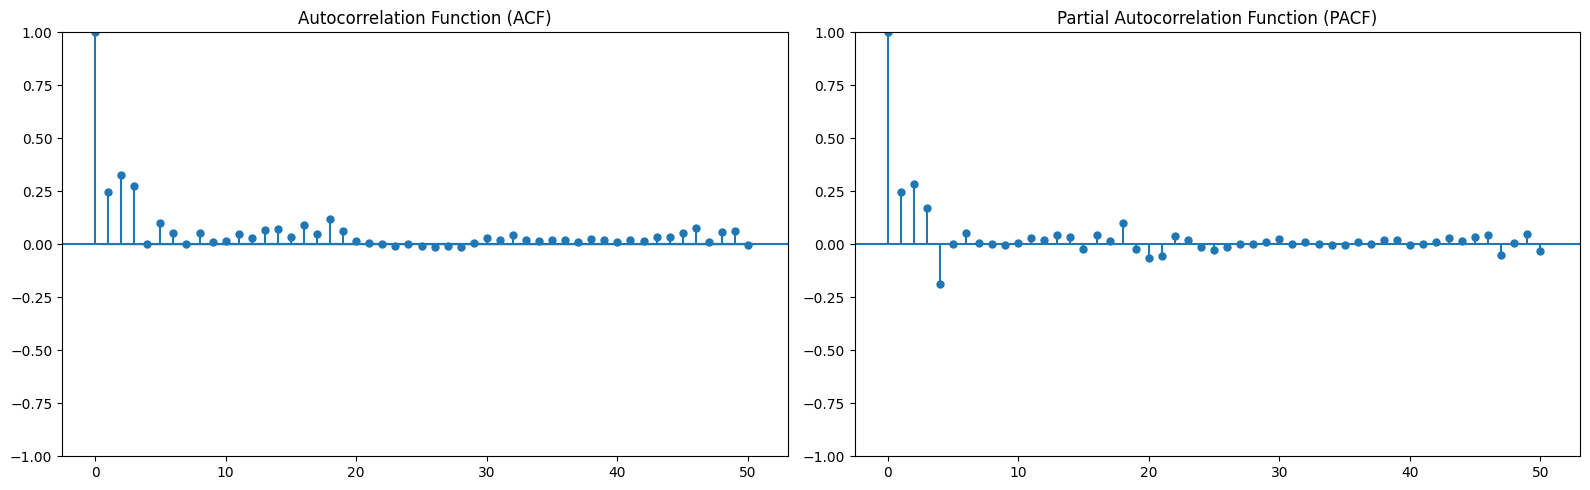

In [49]:
# Obtaining p, d, q values:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# ACF plot
plot_acf(df_encoded['value'], lags=50, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(df_encoded['value'], lags=50, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


In [19]:
import itertools

import itertools

# Define the range for p, d, q
p_values = range(0, 3)  # Example range for p
d_values = range(0, 2)  # Example range for d
q_values = range(0, 3)  # Example range for q

# Generate all possible combinations of p, d, q
param_grid = list(itertools.product(p_values, d_values, q_values))


Akaike Information Criteria (AIC)

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

best_score = float("inf")  # Initialize with a high value
best_params = None

for params in param_grid:
    p, d, q = params
    model = SARIMAX(y_train, exog=X_train, order=(p, d, q))
    fitted_model = model.fit()

    # Example: Use AIC as the scoring metric
    score = fitted_model.aic

    # Update best parameters if current score is better
    if score < best_score:
        best_score = score
        best_params = params


/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is no

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           70     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.68817D+01    |proj g|=  1.16167D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   70      0      1      0     0     0   1.162D-07   1.688D+01
  F =   16.881742201327299     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is no

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           71     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16413D+01    |proj g|=  7.43591D-04


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   71      1     15      1     0     0   7.436D-04   1.164D+01
  F =   11.641284186420290     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           72     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16413D+01    |proj g|=  7.40986D-04


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   72      1      3      1     0     0   7.410D-04   1.164D+01
  F =   11.641281696053804     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is no

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           70     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.73418D+01    |proj g|=  7.38924D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   70      0      1      0     0     0   7.389D-08   1.734D+01
  F =   17.341769260008473     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           71     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19922D+01    |proj g|=  2.17046D-01


 This problem is unconstrained.



At iterate    5    f=  1.18742D+01    |proj g|=  3.74681D-03

At iterate   10    f=  1.18682D+01    |proj g|=  1.87488D-04

At iterate   15    f=  1.18673D+01    |proj g|=  8.41602D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   71     15     16      1     0     0   8.416D-06   1.187D+01
  F =   11.867308079387128     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is no

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           72     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19909D+01    |proj g|=  2.14812D-01


 This problem is unconstrained.



At iterate    5    f=  1.18736D+01    |proj g|=  3.45410D-03

At iterate   10    f=  1.18682D+01    |proj g|=  6.71328D-03

At iterate   15    f=  1.18671D+01    |proj g|=  2.08207D-04

At iterate   20    f=  1.18670D+01    |proj g|=  9.23935D-04

At iterate   25    f=  1.18670D+01    |proj g|=  1.25770D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   72     28     33      1     0     0   6.370D-05   1.187D+01
  F =   11.866960238981443     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is no

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           71     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16413D+01    |proj g|=  7.43587D-04


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   71      1     10      1     0     0   7.436D-04   1.164D+01
  F =   11.641284168861597     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is no

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           72     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16413D+01    |proj g|=  2.78163D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   72      2      4      1     0     0   7.436D-04   1.164D+01
  F =   11.641284177536205     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is no

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           73     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16413D+01    |proj g|=  9.95661D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   73      3      5      1     0     0   7.401D-04   1.164D+01
  F =   11.641283022152704     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is no

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           71     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20597D+01    |proj g|=  1.07033D-01

At iterate    5    f=  1.20529D+01    |proj g|=  2.05951D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   71      5      7      1     0     0   2.060D-06   1.205D+01
  F =   12.052931598292274     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is no

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           72     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19926D+01    |proj g|=  2.51060D-01


 This problem is unconstrained.



At iterate    5    f=  1.18846D+01    |proj g|=  1.40011D-02

At iterate   10    f=  1.18696D+01    |proj g|=  1.93867D-03

At iterate   15    f=  1.18676D+01    |proj g|=  1.87935D-03

At iterate   20    f=  1.18673D+01    |proj g|=  6.64937D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   72     23     26      1     0     0   6.210D-06   1.187D+01
  F =   11.867247599548618     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is no

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           73     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19908D+01    |proj g|=  1.70520D-01

At iterate    5    f=  1.18694D+01    |proj g|=  4.29026D-03

At iterate   10    f=  1.18671D+01    |proj g|=  3.41461D-04

At iterate   15    f=  1.18669D+01    |proj g|=  3.05052D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   73     17     19      1     0     0   7.218D-06   1.187D+01
  F =   11.866937231988603     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is no

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           72     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16413D+01    |proj g|=  7.41015D-04


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   72      1     14      1     0     0   7.410D-04   1.164D+01
  F =   11.641281652283814     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is no

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           73     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16413D+01    |proj g|=  2.78164D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   73      4      6      1     0     0   7.410D-04   1.164D+01
  F =   11.641281664661644     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is no

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           74     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16413D+01    |proj g|=  1.85535D-03

At iterate    5    f=  1.16413D+01    |proj g|=  7.42006D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   74      6      9      1     0     0   7.420D-04   1.164D+01
  F =   11.641263813255136     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is no

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           72     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20128D+01    |proj g|=  1.59205D-01


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   72      4      6      1     0     0   5.077D-06   1.199D+01
  F =   11.991879389357939     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is no

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           73     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19932D+01    |proj g|=  2.48283D-01


 This problem is unconstrained.



At iterate    5    f=  1.18896D+01    |proj g|=  5.61331D-02

At iterate   10    f=  1.18705D+01    |proj g|=  8.94018D-03

At iterate   15    f=  1.18677D+01    |proj g|=  2.31431D-03

At iterate   20    f=  1.18673D+01    |proj g|=  1.48846D-03

At iterate   25    f=  1.18672D+01    |proj g|=  5.71855D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  1.18672D+01    |proj g|=  4.22494D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   73     31     54      2     0     0   6.211D-06   1.187D+01
  F =   11.867239328193616     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is no

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           74     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19914D+01    |proj g|=  2.13376D-01

At iterate    5    f=  1.18765D+01    |proj g|=  4.19018D-02

At iterate   10    f=  1.18678D+01    |proj g|=  2.31600D-03

At iterate   15    f=  1.18671D+01    |proj g|=  2.48681D-03

At iterate   20    f=  1.18669D+01    |proj g|=  5.01626D-04

At iterate   25    f=  1.18669D+01    |proj g|=  3.42502D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   74     28     30      1     0     0   

In [21]:
print("Best Parameters (p, d, q):", best_params)


Best Parameters (p, d, q): (1, 0, 0)


In [50]:
best_fitted = SARIMAX(y_train, exog=X_train, order=(3, 0, 1))
best_fitted_model = model.fit()

/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is no

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           74     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19914D+01    |proj g|=  2.13376D-01

At iterate    5    f=  1.18765D+01    |proj g|=  4.19018D-02

At iterate   10    f=  1.18678D+01    |proj g|=  2.31600D-03

At iterate   15    f=  1.18671D+01    |proj g|=  2.48681D-03

At iterate   20    f=  1.18669D+01    |proj g|=  5.01626D-04

At iterate   25    f=  1.18669D+01    |proj g|=  3.42502D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   74     28     30      1     0     0   

In [51]:
print("Length of y_test:", len(y_test))
print("Length of X_test:", len( X_test))
print("Length of X_train:", len( X_train))
print("Length of y_train:", len( y_train))

Length of y_test: 24212
Length of X_test: 24212
Length of X_train: 96848
Length of y_train: 96848


In [33]:
X_test.index[-1]

Timestamp('2013-09-01 00:00:00')

In [52]:
# Assuming best_fitted_model is your fitted SARIMAX model

# Forecast directly for the test period
start_index = X_test.index[0]
end_index = X_test.index[-1]

# Ensure exog=X_test is correctly specified if needed
y_pred = fitted_model.predict(start=start_index, end=end_index, exog=X_test)

# Check lengths to ensure y_pred matches y_test
print("Length of y_pred:", len(y_pred))  # Should ideally be 24212 to match y_test length
print("Length of y_test:", len(y_test))  # Verify it matches 24212

# Proceed with evaluation metrics like MSE, MAE, etc.


Length of y_pred: 169
Length of y_test: 24212


In [42]:
# Assuming X_train and y_train were used to train best_fitted_model
# X_test and y_test are used for evaluation

# Check dimensions of X_train and X_test
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

# Check if indices are aligned
print("Index of X_train:", X_train.index)
print("Index of X_test:", X_test.index)

# Print a few rows to inspect structure and ensure consistency
print("Head of X_train:")
print(X_train.head())

print("Head of X_test:")
print(X_test.head())

# Ensure exog=X_test is correctly specified when predicting
y_pred = best_fitted_model.predict(start=X_test.index[0], end=X_test.index[-1], exog=X_test)

# Check lengths to ensure y_pred matches y_test
print("Length of y_pred:", len(y_pred))
print("Length of y_test:", len(y_test))

# Proceed with evaluation metrics like MSE, MAE, etc.


Shape of X_train: (96848, 69)
Shape of X_test: (24212, 69)
Index of X_train: DatetimeIndex(['2019-01-01', '2015-11-01', '2014-09-01', '2013-07-01',
               '2015-12-01', '2018-02-01', '2010-08-01', '2021-12-01',
               '2018-08-01', '2021-05-01',
               ...
               '2020-02-01', '2015-05-01', '2023-04-01', '2018-06-01',
               '2015-12-01', '2011-07-01', '2010-02-01', '2012-06-01',
               '2023-11-01', '2022-02-01'],
              dtype='datetime64[ns]', name='date', length=96848, freq=None)
Index of X_test: DatetimeIndex(['2022-03-01', '2020-10-01', '2019-10-01', '2015-12-01',
               '2019-05-01', '2012-08-01', '2020-01-01', '2015-10-01',
               '2018-08-01', '2015-04-01',
               ...
               '2023-06-01', '2012-04-01', '2022-10-01', '2021-08-01',
               '2014-04-01', '2013-03-01', '2019-02-01', '2016-12-01',
               '2018-03-01', '2013-09-01'],
              dtype='datetime64[ns]', name='date',

In [43]:
# Ensure start and end indices are correctly set to cover the entire X_test period
start_index = X_test.index[0]  # Start from the first index of X_test
end_index = X_test.index[-1]   # End at the last index of X_test

# Predict using the SARIMAX model with exogenous variables (X_test)
y_pred = best_fitted_model.predict(start=start_index, end=end_index, exog=X_test)

# Check lengths to ensure y_pred matches y_test
print("Length of y_pred:", len(y_pred))
print("Length of y_test:", len(y_test))


Length of y_pred: 169
Length of y_test: 24212


In [44]:
# Double-checking the indices and their range
print("Index of X_test:", X_test.index)
print("Length of X_test:", len(X_test))

Index of X_test: DatetimeIndex(['2022-03-01', '2020-10-01', '2019-10-01', '2015-12-01',
               '2019-05-01', '2012-08-01', '2020-01-01', '2015-10-01',
               '2018-08-01', '2015-04-01',
               ...
               '2023-06-01', '2012-04-01', '2022-10-01', '2021-08-01',
               '2014-04-01', '2013-03-01', '2019-02-01', '2016-12-01',
               '2018-03-01', '2013-09-01'],
              dtype='datetime64[ns]', name='date', length=24212, freq=None)
Length of X_test: 24212


In [45]:
# Double-checking the indices and their range
print("Index of X_test:", X_test.index)
print("Length of X_test:", len(X_test))

# Ensure start and end indices are correctly set to cover the entire X_test period
start_index = X_test.index[0]  # Start from the first index of X_test
end_index = X_test.index[-1]   # End at the last index of X_test

# Predict using the SARIMAX model with exogenous variables (X_test)
y_pred = best_fitted_model.predict(start=start_index, end=end_index, exog=X_test)

# Check lengths to ensure y_pred matches y_test
print("Length of y_pred:", len(y_pred))
print("Length of y_test:", len(y_test))


Index of X_test: DatetimeIndex(['2022-03-01', '2020-10-01', '2019-10-01', '2015-12-01',
               '2019-05-01', '2012-08-01', '2020-01-01', '2015-10-01',
               '2018-08-01', '2015-04-01',
               ...
               '2023-06-01', '2012-04-01', '2022-10-01', '2021-08-01',
               '2014-04-01', '2013-03-01', '2019-02-01', '2016-12-01',
               '2018-03-01', '2013-09-01'],
              dtype='datetime64[ns]', name='date', length=24212, freq=None)
Length of X_test: 24212
Length of y_pred: 169
Length of y_test: 24212
